### Selenium을 이용한 이미지 크롤링
- 유튜브 영상을 이미지로 크롤링
- 특정 영역(Element)을 자르기
    - pillow : python을 이용해서 이미지를 전처리 해주는 대표적인 패키지
    - conda install -c anaconda pillow
    - pip install pillow
- 유튜브 영상 데이터를 다운로드
- fake_useragent 사용법
    - headless 설정 : 브라우저를 화면에 띄우지 않고 RAM 영역에만 띄워서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할 때 사용

In [2]:
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린샷

In [6]:
!mkdir data

In [5]:
url = "https://www.youtube.com/watch?v=mmg_pUOUvCw&t=120s&ab_channel=Apple"
driver = webdriver.Chrome()
driver.get(url)

In [8]:
driver.save_screenshot("data/screenshot.png")
driver.quit()

In [9]:
!ls data

screenshot.png


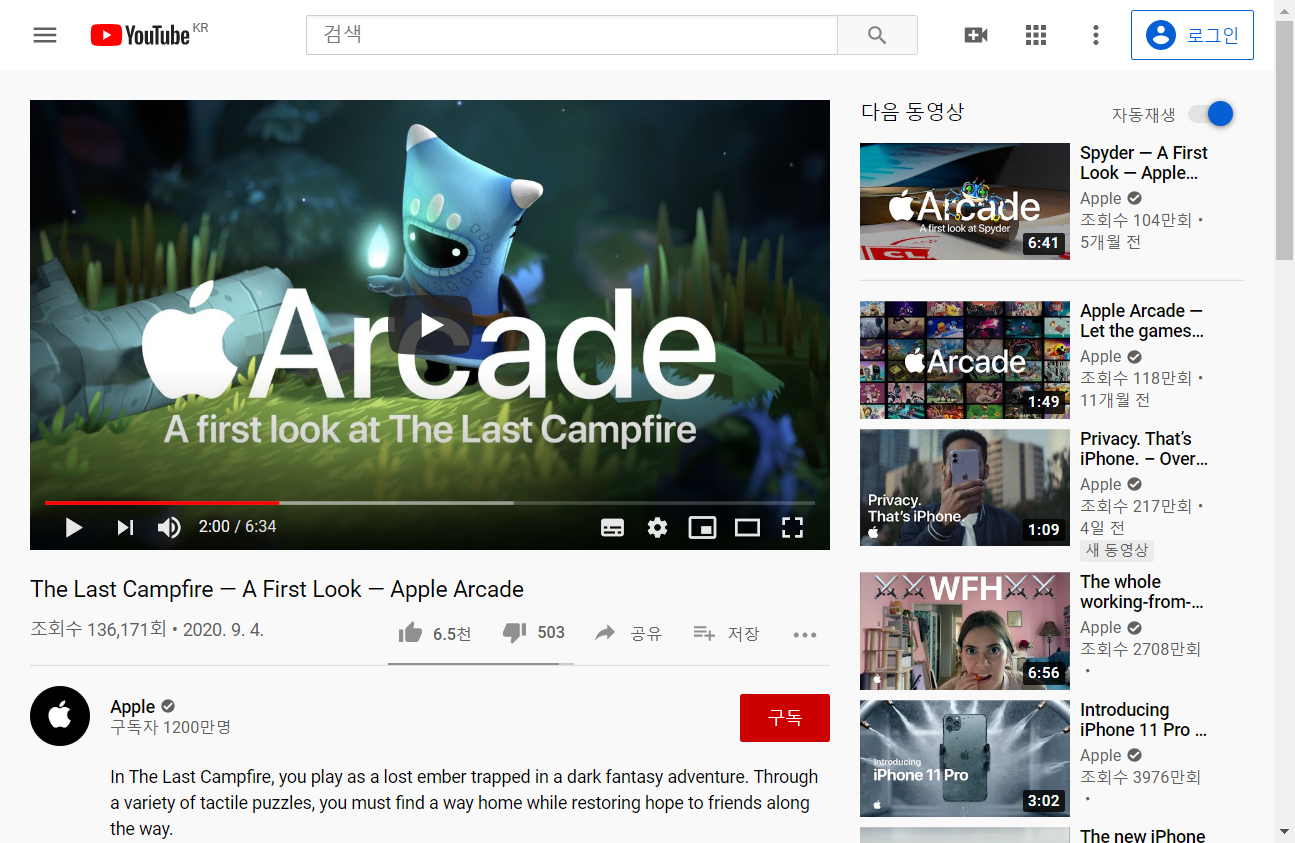

In [11]:
pil_img = pil.open("data/screenshot.png")
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [12]:
driver = webdriver.Chrome()
driver.get(url)

In [13]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 360, 'width': 640}


In [32]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰주어야 합니다.
ratio = 1.25
left = location["x"] *ratio
top = location["y"] *ratio
right = left + size["width"] *ratio
bottom = top + size["height"] *ratio
area = (left, top, right, bottom)
area

(30.0, 100.0, 830.0, 550.0)

#### 3. 이미지를 pillow로 잘라주기

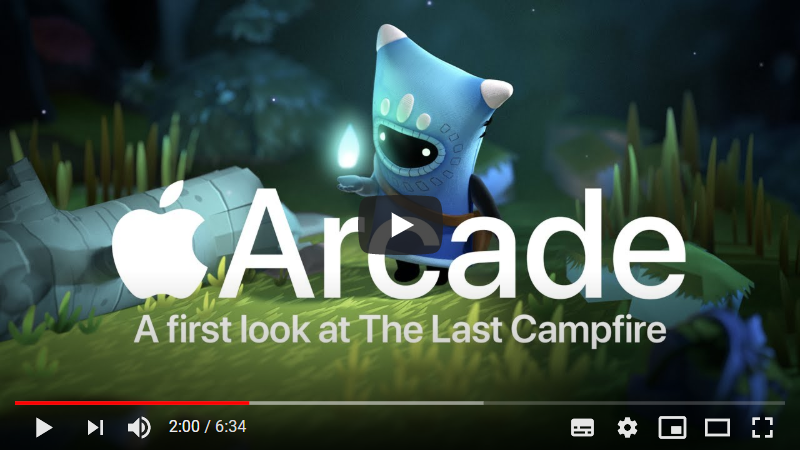

In [33]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [34]:
# 이미지 저장
pil_element_img.save("data/screenshot_element.png")

In [37]:
!ls data

screenshot.png
screenshot_element.png


#### 썸네일 만들기
- 원본 이미지를 다양한 사이즈로 축소하는 방법

In [38]:
pil_element_img.size

(800, 450)

(284, 160)


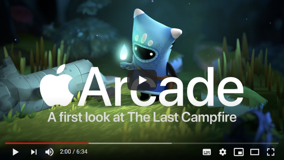

In [40]:
pil_element_img.thumbnail((320, 160))
print(pil_element_img.size)
pil_element_img

#### fake useragent

In [41]:
from fake_useragent import UserAgent

In [45]:
# 크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36


In [50]:
UserAgent().chrome

'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.16 Safari/537.36'

In [51]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.116 Safari/537.36 Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B334b Safari/531.21.10


#### Headless
- 브라우저를 화면에 띄우지 않고 메모리 상에서만 실행하는 방법
- 크롬 버전 60 이상에서만 사용이 가능
- window 화면이 지원되지 않는 환경에서 사용

In [52]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get("https://www.fastcampus.co.kr/")
print(driver.title)
driver.quit()

커리어 성장을 위한 최고의 실무교육 아카데미 | 패스트캠퍼스


#### 영상 파일 다운로드
- www. -> ss 로 변경하면 다운로드 받을 수 있는 사이트에 접속

In [68]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "data/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [69]:
url

'https://www.youtube.com/watch?v=mmg_pUOUvCw&t=120s&ab_channel=Apple'

In [70]:
link = "https://r3---sn-u0g3uxax3-pnus.googlevideo.com/videoplayback?expire=1599576867&ei=wkZXX8z2O5TF1wLQ2pX4Bw&ip=37.148.210.240&id=o-AC38qaw2ca_-CShBYtba3FMpGzMUJu_gk-AnQ8IbMSt-&itag=22&source=youtube&requiressl=yes&mh=x7&mm=31%2C29&mn=sn-u0g3uxax3-pnus%2Csn-nv47lnl7&ms=au%2Crdu&mv=m&mvi=3&pcm2cms=yes&pl=24&initcwndbps=792500&vprv=1&mime=video%2Fmp4&ratebypass=yes&dur=394.460&lmt=1599297923666540&mt=1599555154&fvip=3&c=WEB&txp=5535432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRgIhAJNaLBLF_1BPKD6FJOBnaJxMjhqHue4ii8_nUN65AqA_AiEAiJS8u29euiPY2nRgsqDBHpe9B8h6GxJUGiu3U9G5-E4%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpcm2cms%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRAIgNvybnc0MQ6SCA65Lg6t4RNf20_ZbjsqgyYCsY8enAnICIF-9UdRjTtKtzWRLsJwFxP9wPUllABD5WoeiMa_Af6HT&contentlength=36403669&video_id=mmg_pUOUvCw&title=The+Last+Campfire+%E2%80%94+A+First+Look+%E2%80%94+Apple+Arcade"

In [71]:
title = "The Last Campfire — A First Look — Apple Arcade.mp4"
size = download(title, link)
print("{} Mb".format(round(size/1024/1024), 2))

35 Mb
